# BERT Analysis

In [145]:
from transformers import BertTokenizerFast,BertModel
import torch
import numpy as np

In [146]:
bert_token = BertTokenizerFast.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [104]:
bert_input1 = bert_token.batch_encode_plus(["Hello Text"],return_tensors='pt')
print(bert_input1['input_ids'])

tensor([[ 101, 7592, 3793,  102]])


In [105]:
bert_input2 = bert_token.batch_encode_plus(["Hello Hello"],
                                           return_tensors='pt')
print(bert_input2['input_ids'])

tensor([[ 101, 7592, 7592,  102]])


In [106]:
bert_output1 = bert_model(**bert_input1)
bert_output2 = bert_model(**bert_input2)

In [107]:
print(bert_output1.last_hidden_state[0])
bert_output1_numpy = bert_output1.last_hidden_state[0].detach().numpy()

tensor([[-0.2727,  0.1001, -0.3154,  ..., -0.4076, -0.0145,  0.4044],
        [-0.5005, -0.0931,  0.4686,  ..., -0.2741,  0.5142,  0.0427],
        [ 0.0530, -0.2962,  0.5598,  ..., -0.5481, -0.4635,  0.0556],
        [ 0.8331,  0.0527, -0.2778,  ...,  0.2315, -0.6324, -0.3214]],
       grad_fn=<SelectBackward0>)


In [108]:
print(bert_output2.last_hidden_state[0])
bert_output2_numpy = bert_output2.last_hidden_state[0].detach().numpy()

tensor([[-0.4887,  0.2862, -0.0762,  ..., -0.1761,  0.0219,  0.4982],
        [-0.6418,  0.4241,  0.8427,  ..., -0.3444,  0.3837,  0.1337],
        [-1.2194,  0.3288,  0.7549,  ..., -0.2203, -0.3018,  0.0950],
        [ 0.8473, -0.0105, -0.2003,  ...,  0.4479, -0.4860, -0.4106]],
       grad_fn=<SelectBackward0>)


<AxesSubplot: >

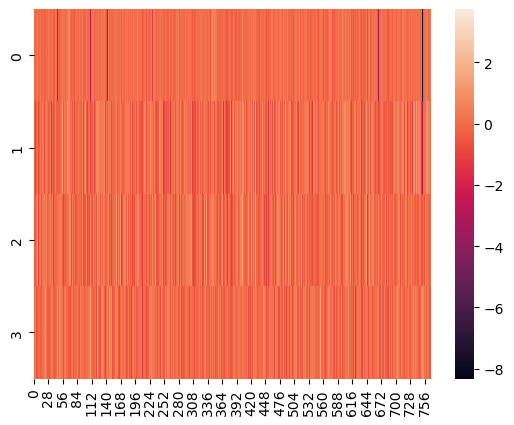

In [109]:
import seaborn as sns
sns.heatmap(bert_output1_numpy)

<AxesSubplot: >

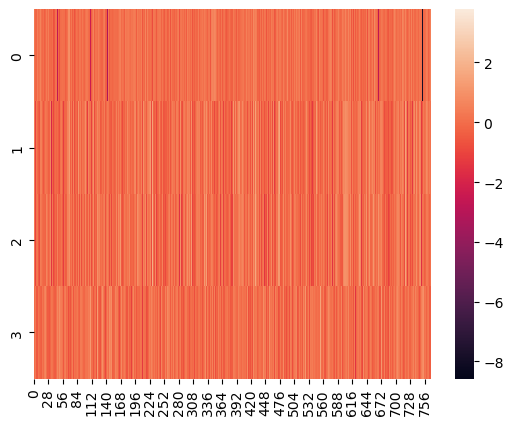

In [110]:
sns.heatmap(bert_output2_numpy)

## Effect of padding


In [87]:
bert_input = bert_token.batch_encode_plus(["Hello Hello help the people","Hello Text nice","Hello Text"],
                                           padding = 'longest',
                                           return_tensors='pt')

In [94]:
bert_output_numpy = bert_model(**bert_input).last_hidden_state.detach().numpy()

<AxesSubplot: >

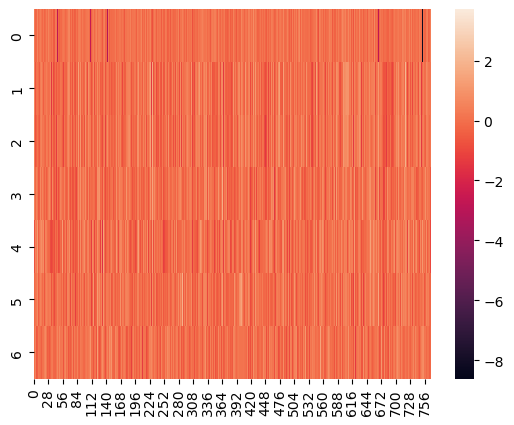

In [95]:
sns.heatmap(bert_output_numpy[0])

<AxesSubplot: >

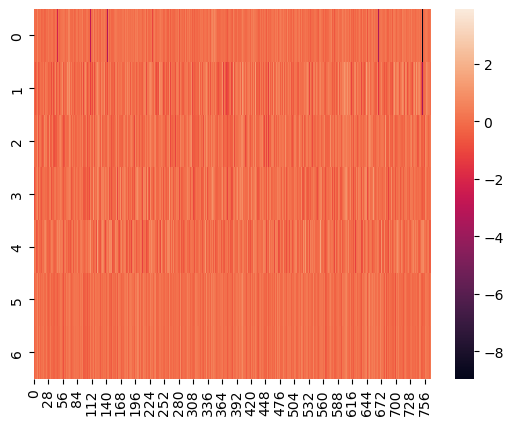

In [96]:
sns.heatmap(bert_output_numpy[1])

<AxesSubplot: >

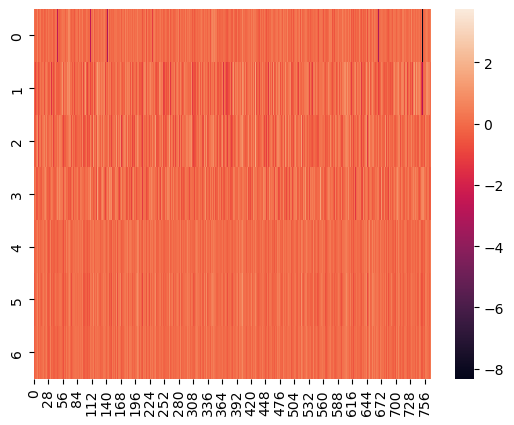

In [97]:
sns.heatmap(bert_output_numpy[2])

In [101]:
bert_output_numpy[2][-1]

array([-3.78614217e-01, -2.91342109e-01,  3.97560090e-01, -5.66277616e-02,
       -8.06557713e-04,  2.47592293e-02,  1.95324898e-01,  4.94359881e-01,
        3.00709218e-01, -2.24752337e-01, -3.96722674e-01,  1.31813079e-01,
       -1.43720791e-01, -1.08972736e-01,  1.96412392e-02, -1.23509476e-02,
        8.69102776e-02,  3.88062954e-01,  3.02534550e-01,  1.14737414e-01,
       -1.51536331e-01,  6.44987747e-02,  1.03409812e-01, -4.10212308e-01,
        4.34377342e-01, -1.08381556e-02, -2.79795080e-01,  3.73292016e-03,
       -5.14848232e-01, -4.85347211e-02, -3.63479763e-01, -2.05503121e-01,
        5.43656707e-01,  2.30006929e-02, -2.63861299e-01, -7.11750165e-02,
       -3.34665328e-02,  2.55221296e-02, -3.17936271e-01,  2.71595865e-01,
       -3.54191929e-01, -3.11419040e-01, -9.90982354e-02, -5.61823510e-02,
       -1.18999802e-01, -2.47240633e-01, -4.41273034e-01, -1.29665062e-01,
       -2.27490768e-01,  1.44257620e-02, -7.96067119e-02,  1.01003632e-01,
       -4.99170721e-01,  

In [102]:
bert_output_numpy[1][-1]

array([-2.80447364e-01, -3.07460755e-01,  3.67953122e-01, -1.06891128e-03,
       -1.09934568e-01,  1.99534334e-02,  5.15753105e-02,  6.03589475e-01,
        3.39836359e-01, -2.93666929e-01, -3.69533420e-01,  3.11134756e-01,
       -2.34962851e-02, -1.96715981e-01,  2.86725275e-02,  4.34291959e-02,
        7.90678058e-03,  4.14203405e-01,  2.47310355e-01,  1.67933390e-01,
       -1.38572276e-01, -4.48240750e-02, -1.21464819e-01, -3.33180755e-01,
        3.26561928e-01,  1.29021019e-01, -2.04640403e-01,  3.01138405e-02,
       -4.09612983e-01, -5.47720455e-02, -2.23363250e-01, -7.76840672e-02,
        3.28100204e-01,  1.63092092e-01, -1.72175303e-01, -2.16198027e-01,
       -1.55958578e-01,  1.37265129e-02, -3.51440370e-01,  2.97647119e-01,
       -3.50387216e-01, -3.42442662e-01, -5.24362996e-02, -6.71257451e-02,
       -1.41833842e-01, -2.85905033e-01, -4.00426865e-01, -1.33603275e-01,
       -9.13779363e-02, -9.58044529e-02,  5.36754690e-02,  2.72245347e-01,
       -3.63472283e-01,  

## Cosine similarity

In [170]:
sent_1 = "Hello is Text"
sent_2 = "This is Hello"

# index of the same text
sent1_idxs = [0,1]
sent2_idxs = [1,2]

# Generate the bert Tokens
tok_1 = bert_token(text=sent_1, return_tensors='pt')
tok_2 = bert_token(text=sent_2, return_tensors='pt')

# Get the position of the actual words in the generator tokens
tok1_ids = [np.where(np.array(tok_1.word_ids()) == idx) for idx in sent1_idxs]
tok2_ids = [np.where(np.array(tok_2.word_ids()) == idx) for idx in sent2_idxs]

# torch.no_grad() prevents the backtracking feature 
with torch.no_grad():
    bert_output1 = bert_model(**tok_1)
    bert_output2 = bert_model(**tok_2)
    
# remove the batch index 
final_state1 = bert_output1.last_hidden_state[-1].squeeze()
final_state2 = bert_output2.last_hidden_state[-1].squeeze()

# get the corresponding word embedding
emb1 = final_state1[[tup[0][0] for tup in tok1_ids]]
emb2 = final_state2[[tup[0][0] for tup in tok2_ids]]

# Get the average of the word embeddings 
avg1 = emb1.mean(axis=0)
avg2 = emb2.mean(axis=0)

torch.cosine_similarity(avg1.reshape(1,-1), avg2.reshape(1,-1))

tensor([0.7577])

In [152]:
print(tok1_ids)
print(tok2_ids)

[(array([1]),), (array([2]),)]
[(array([2]),), (array([3]),)]


In [162]:
print(emb1)

tensor([[-0.6834, -0.5578,  0.3747,  ..., -0.0306,  0.4723,  0.2722],
        [-0.3791, -0.5232,  0.2075,  ..., -0.4116,  0.2235,  1.4854]])


In [168]:
print(avg1.shape)

torch.Size([768])


In [ ]:
def find_cosine_similarity(text1, text2,bert_model, bert_tokenizer):
    tok1 = bert_tokenizer (text = text1, return_tensors = 'pt')
    tok2 = bert_tokenizer (text = text2, return_tensors = 'pt')
    
    
    